In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


import pickle
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Reading the data from the dataset
data=pd.read_csv("housing_train.csv")
data.head()#seeing the first 10 records
#data.tail(20)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al
2,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825,apartment,1133,1,1.5,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
3,7041966936,https://bham.craigslist.org/apa/d/birmingham-f...,birmingham,https://bham.craigslist.org,800,apartment,927,1,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
4,7041966888,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,785,apartment,1047,2,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al


In [ ]:
data.shape

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265190 entries, 0 to 265189
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       265190 non-null  int64  
 1   url                      265190 non-null  object 
 2   region                   265190 non-null  object 
 3   region_url               265190 non-null  object 
 4   price                    265190 non-null  int64  
 5   type                     265190 non-null  object 
 6   sqfeet                   265190 non-null  int64  
 7   beds                     265190 non-null  int64  
 8   baths                    265190 non-null  float64
 9   cats_allowed             265190 non-null  int64  
 10  dogs_allowed             265190 non-null  int64  
 11  smoking_allowed          265190 non-null  int64  
 12  wheelchair_access        265190 non-null  int64  
 13  electric_vehicle_charge  265190 non-null  int64  
 14  come

In [3]:
data.dtypes

id                           int64
url                         object
region                      object
region_url                  object
price                        int64
type                        object
sqfeet                       int64
beds                         int64
baths                      float64
cats_allowed                 int64
dogs_allowed                 int64
smoking_allowed              int64
wheelchair_access            int64
electric_vehicle_charge      int64
comes_furnished              int64
laundry_options             object
parking_options             object
image_url                   object
description                 object
lat                        float64
long                       float64
state                       object
dtype: object

In [5]:
data['url'] = pd.to_numeric(data['url'], errors='coerce')
data = data.replace(np.nan, data["url"].mean(), regex=True)

data['region'] = pd.to_numeric(data['region'], errors='coerce')
data = data.replace(np.nan,data["region"].mean(), regex=True)

data['region_url'] = pd.to_numeric(data['region_url'], errors='coerce')
data = data.replace(np.nan, data["region_url"].mean(), regex=True)

data['type'] = pd.to_numeric(data['type'], errors='coerce')
data = data.replace(np.nan, data["type"].mean(), regex=True)

data['laundry_options'] = pd.to_numeric(data['laundry_options'], errors='coerce')
data = data.replace(np.nan, data["laundry_options"].mean(), regex=True)

data['parking_options'] = pd.to_numeric(data['parking_options'], errors='coerce')
data = data.replace(np.nan, data["parking_options"].mean(), regex=True)

data['image_url'] = pd.to_numeric(data['image_url'], errors='coerce')
data = data.replace(np.nan,data["image_url"].mean(), regex=True)

data['description'] = pd.to_numeric(data['description'], errors='coerce')
data = data.replace(np.nan, data["description"].mean(), regex=True)

data['state'] = pd.to_numeric(data['state'], errors='coerce')
data = data.replace(np.nan, data["state"].mean(), regex=True)

#data["lat"]=data["lat"].fillna(data["lat"].mean())
#data["long"]=data["long"].fillna(data["long"].mean())



In [6]:
#data=pd.DataFrame(data=data,dtype=np.float64)
data=pd.DataFrame(data=data,dtype=np.int64)
#data

In [7]:
data.dtypes

id                         int64
url                        int64
region                     int64
region_url                 int64
price                      int64
type                       int64
sqfeet                     int64
beds                       int64
baths                      int64
cats_allowed               int64
dogs_allowed               int64
smoking_allowed            int64
wheelchair_access          int64
electric_vehicle_charge    int64
comes_furnished            int64
laundry_options            int64
parking_options            int64
image_url                  int64
description                int64
lat                        int64
long                       int64
state                      int64
dtype: object

In [8]:
data.dtypes

id                         int64
url                        int64
region                     int64
region_url                 int64
price                      int64
type                       int64
sqfeet                     int64
beds                       int64
baths                      int64
cats_allowed               int64
dogs_allowed               int64
smoking_allowed            int64
wheelchair_access          int64
electric_vehicle_charge    int64
comes_furnished            int64
laundry_options            int64
parking_options            int64
image_url                  int64
description                int64
lat                        int64
long                       int64
state                      int64
dtype: object

In [42]:
data.isna().sum()

id                         0
url                        0
region                     0
region_url                 0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
image_url                  0
description                0
lat                        0
long                       0
state                      0
dtype: int64

In [81]:
data.describe(include='all')

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
count,2.651900e+05,2.651900e+05,2.651900e+05,2.651900e+05,2.651900e+05,2.651900e+05,2.651900e+05,265190.000000,265190.000000,265190.000000,...,265190.000000,265190.000000,265190.000000,2.651900e+05,2.651900e+05,2.651900e+05,265190.000000,265190.000000,265190.000000,2.651900e+05
mean,7.040888e+09,6.632033e+04,6.632033e+04,6.632033e+04,1.227285e+04,6.632033e+04,1.093678e+03,1.912414,1.483468,0.716822,...,0.078759,0.014360,0.048644,6.632033e+04,6.632033e+04,6.632033e+04,66320.333334,391.881933,262.968441,6.632033e+04
std,8.778930e+06,2.189485e-07,2.189485e-07,2.189485e-07,5.376352e+06,2.189485e-07,2.306888e+04,3.691900,0.630208,0.450543,...,0.269362,0.118968,0.215124,2.189485e-07,2.189485e-07,2.189485e-07,89.250074,4835.614422,4845.097434,2.189485e-07
min,7.003808e+09,6.632033e+04,6.632033e+04,6.632033e+04,0.000000e+00,6.632033e+04,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,6.632033e+04,6.632033e+04,6.632033e+04,32114.000000,-43.533300,-163.894000,6.632033e+04
25%,7.035963e+09,6.632033e+04,6.632033e+04,6.632033e+04,8.170000e+02,6.632033e+04,7.520000e+02,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,6.632033e+04,6.632033e+04,6.632033e+04,66320.333333,33.522225,-104.531750,6.632033e+04
50%,7.043109e+09,6.632033e+04,6.632033e+04,6.632033e+04,1.060000e+03,6.632033e+04,9.500000e+02,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,6.632033e+04,6.632033e+04,6.632033e+04,66320.333333,37.987700,-86.419900,6.632033e+04
75%,7.048362e+09,6.632033e+04,6.632033e+04,6.632033e+04,1.450000e+03,6.632033e+04,1.156000e+03,2.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,6.632033e+04,6.632033e+04,6.632033e+04,66320.333333,41.239300,-81.235800,6.632033e+04
max,7.051263e+09,6.632033e+04,6.632033e+04,6.632033e+04,2.768307e+09,6.632033e+04,8.388607e+06,1100.000000,75.000000,1.000000,...,1.000000,1.000000,1.000000,6.632033e+04,6.632033e+04,6.632033e+04,96789.000000,66320.333333,66320.333333,6.632033e+04


In [82]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

In [83]:
data['url'].count()#,data['lat']

265190

In [84]:
data['url'].isna().sum()

0

In [85]:
#filling each column missing values with mean and mode

#data["url"]=data["url"].fillna(data["url"].mean())

#data["region"]=data["region"].fillna(data["region"].mean())
#data["region_url"]=data["region_url"].fillna(data["region_url"].mean())
#data["type"]=data["type"].fillna(data["type"].mean())
#data["laundry_options"]=data["laundry_options"].fillna(data["laundry_options"].mean())
#data["parking_options"]=data["parking_options"].fillna(data["parking_options"].mean())
#data["image_url"]=data["image_url"].fillna(data["image_url"].mean())


#data["description"]=data["description"].fillna(data["description"].mean())
#data["lat"]=data["lat"].fillna(data["lat"].mean())
#data["long"]=data["long"].fillna(data["long"].mean())
#data["state"]=data["state"].fillna(data["state"].mean())

In [64]:
data.isna().sum()

id                         0
url                        0
region                     0
region_url                 0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
image_url                  0
description                0
lat                        0
long                       0
state                      0
dtype: int64

In [15]:
data.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,2.651900e+05,2.651900e+05,2.651900e+05,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000
mean,7.040888e+09,1.227285e+04,1.093678e+03,1.912414,1.483468,0.716822,0.696550,0.733896,0.078759,0.014360,0.048644,37.208855,-92.398149
std,8.778930e+06,5.376352e+06,2.306888e+04,3.691900,0.630208,0.450543,0.459749,0.441920,0.269362,0.118968,0.215124,5.644486,17.324243
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035963e+09,8.170000e+02,7.520000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.522225,-104.531750
50%,7.043109e+09,1.060000e+03,9.500000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.974300,-86.536600
75%,7.048362e+09,1.450000e+03,1.156000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.144550,-81.292200
max,7.051263e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


In [72]:
data.columns


Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

In [8]:
data

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,66320.333333,66320.333333,66320.333333,1195,66320.333333,1908,3,2.0,1,...,0,0,0,66320.333333,66320.333333,66320.333333,66320.333333,33.422600,-86.706500,66320.333333
1,7041970863,66320.333333,66320.333333,66320.333333,1120,66320.333333,1319,3,2.0,1,...,0,0,0,66320.333333,66320.333333,66320.333333,66320.333333,33.375500,-86.804500,66320.333333
2,7041966914,66320.333333,66320.333333,66320.333333,825,66320.333333,1133,1,1.5,1,...,0,0,0,66320.333333,66320.333333,66320.333333,66320.333333,33.422600,-86.706500,66320.333333
3,7041966936,66320.333333,66320.333333,66320.333333,800,66320.333333,927,1,1.0,1,...,0,0,0,66320.333333,66320.333333,66320.333333,66320.333333,33.422600,-86.706500,66320.333333
4,7041966888,66320.333333,66320.333333,66320.333333,785,66320.333333,1047,2,1.0,1,...,0,0,0,66320.333333,66320.333333,66320.333333,66320.333333,33.422600,-86.706500,66320.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265185,7050851033,66320.333333,66320.333333,66320.333333,0,66320.333333,1061,2,2.0,1,...,0,0,0,66320.333333,66320.333333,66320.333333,66320.333333,40.049500,-83.066900,66320.333333
265186,7050887997,66320.333333,66320.333333,66320.333333,1069,66320.333333,1020,2,1.5,1,...,0,0,0,66320.333333,66320.333333,66320.333333,66320.333333,39.840800,-83.080400,66320.333333
265187,7044801015,66320.333333,66320.333333,66320.333333,1507,66320.333333,1660,2,1.5,1,...,0,0,0,66320.333333,66320.333333,66320.333333,66320.333333,40.056400,-83.041700,66320.333333
265188,7050885800,66320.333333,66320.333333,66320.333333,1001,66320.333333,1220,3,1.5,1,...,0,0,0,66320.333333,66320.333333,66320.333333,66320.333333,40.045100,-82.456400,66320.333333


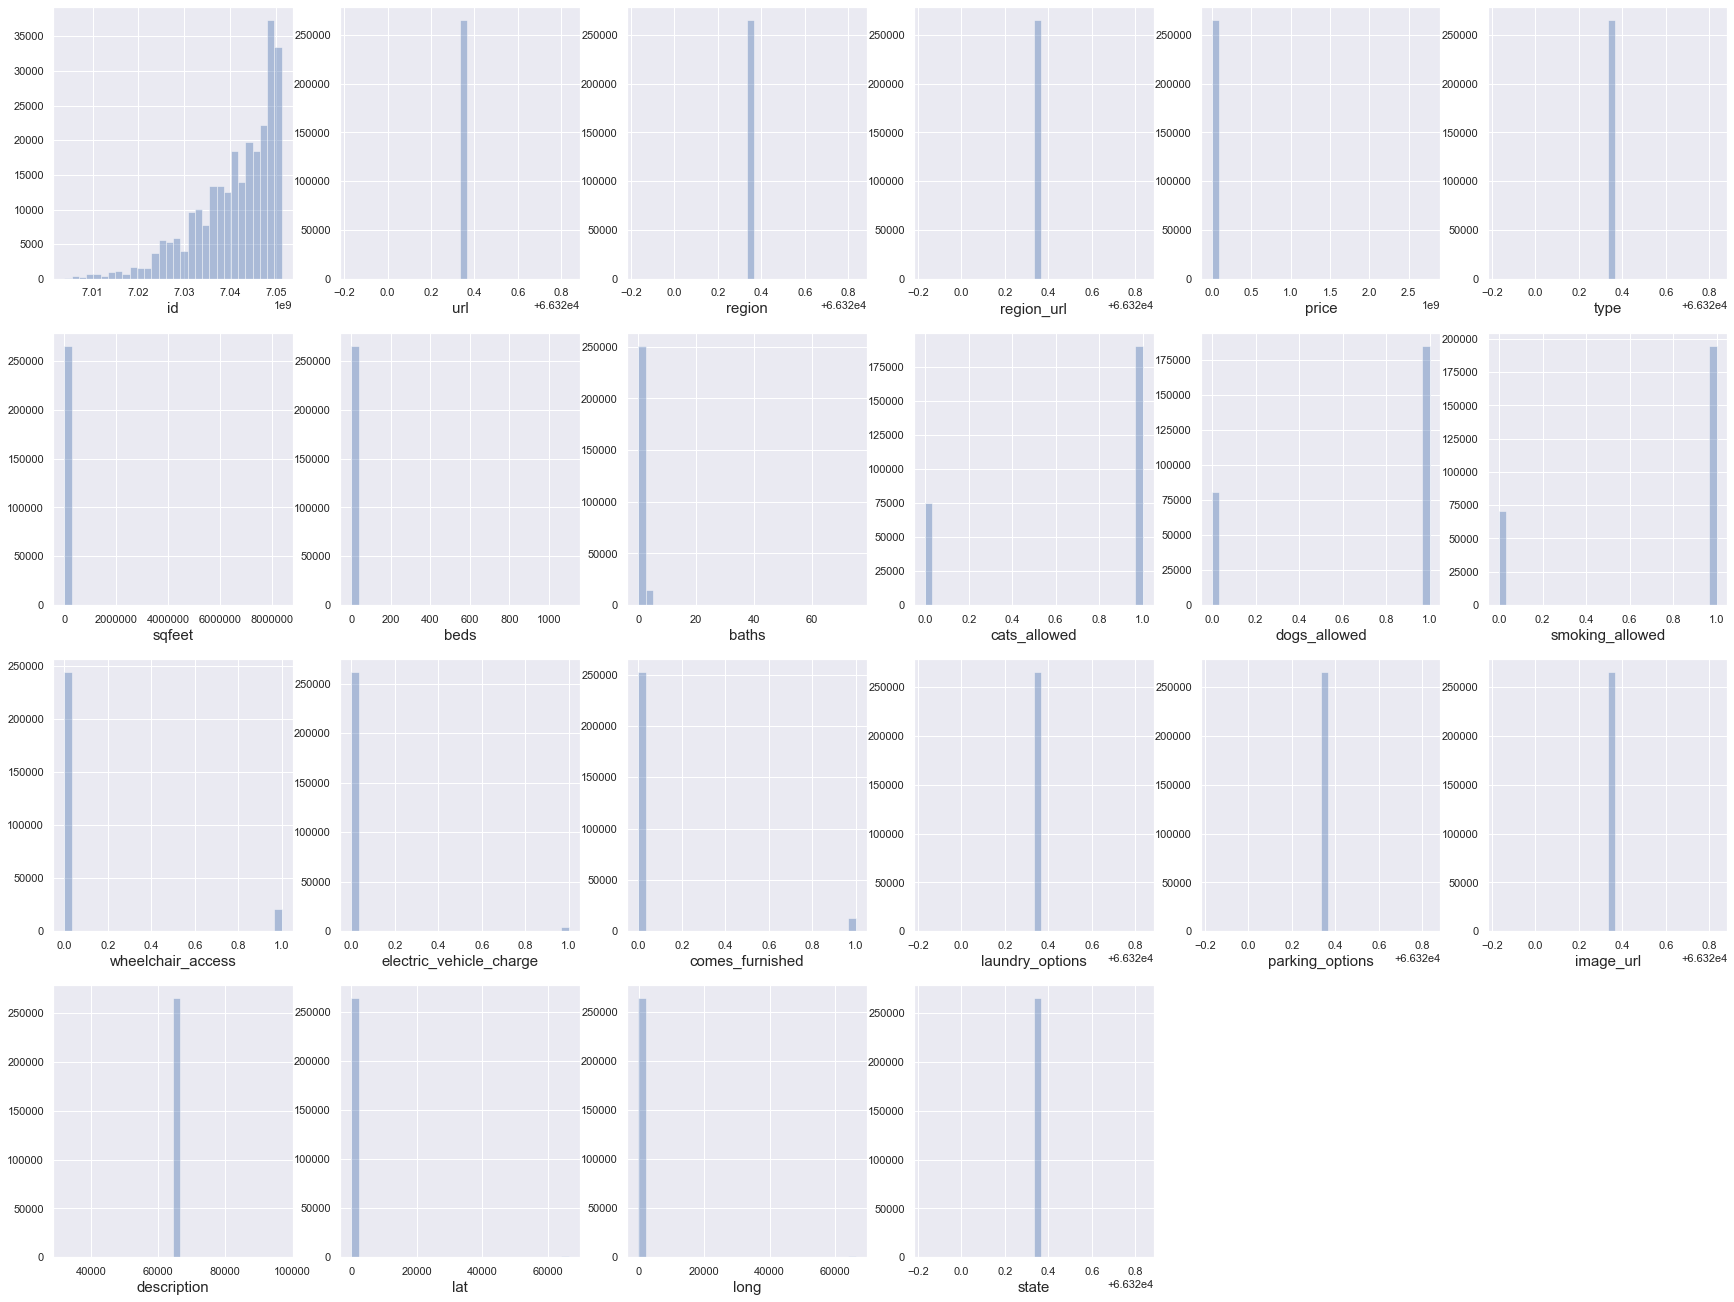

In [43]:
#seeing how is data is distributed for every column
plt.figure(figsize=(30,35),facecolor="white")
plotnumber=1

for column in data:
    if plotnumber<=22:
        ax=plt.subplot(6,6,plotnumber)
        #sns.distplot(data[column])
        sns.distplot(data[column], kde = False, hist = True, rug= False, bins= 30)
        plt.xlabel(column,fontsize=15)
       # plt.ylabel("Price",fontsize=20)
    plotnumber+=1
plt.show()
        

In [9]:
#Separating the feature and the Label columns 
x=data.drop(labels='price', axis=1)
y= data['price']

In [11]:
x

,id,url,region,region_url,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,66320.333333,66320.333333,66320.333333,66320.333333,1908,3,2.0,1,1,...,0,0,0,66320.333333,66320.333333,66320.333333,66320.333333,33.422600,-86.706500,66320.333333
1,7041970863,66320.333333,66320.333333,66320.333333,66320.333333,1319,3,2.0,1,1,...,0,0,0,66320.333333,66320.333333,66320.333333,66320.333333,33.375500,-86.804500,66320.333333
2,7041966914,66320.333333,66320.333333,66320.333333,66320.333333,1133,1,1.5,1,1,...,0,0,0,66320.333333,66320.333333,66320.333333,66320.333333,33.422600,-86.706500,66320.333333
3,7041966936,66320.333333,66320.333333,66320.333333,66320.333333,927,1,1.0,1,1,...,0,0,0,66320.333333,66320.333333,66320.333333,66320.333333,33.422600,-86.706500,66320.333333
4,7041966888,66320.333333,66320.333333,66320.333333,66320.333333,1047,2,1.0,1,1,...,0,0,0,66320.333333,66320.333333,66320.333333,66320.333333,33.422600,-86.706500,66320.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265185,7050851033,66320.333333,66320.333333,66320.333333,66320.333333,1061,2,2.0,1,1,...,0,0,0,66320.333333,66320.333333,66320.333333,66320.333333,40.049500,-83.066900,66320.333333
265186,7050887997,66320.333333,66320.333333,66320.333333,66320.333333,1020,2,1.5,1,1,...,0,0,0,66320.333333,66320.333333,66320.333333,66320.333333,39.840800,-83.080400,66320.333333
265187,7044801015,66320.333333,66320.333333,66320.333333,66320.333333,1660,2,1.5,1,1,...,0,0,0,66320.333333,66320.333333,66320.333333,66320.333333,40.056400,-83.041700,66320.333333
265188,7050885800,66320.333333,66320.333333,66320.333333,66320.333333,1220,3,1.5,1,1,...,0,0,0,66320.333333,66320.333333,66320.333333,66320.333333,40.045100,-82.456400,66320.333333


In [12]:
y

0         1195
1         1120
2          825
3          800
4          785
          ... 
265185       0
265186    1069
265187    1507
265188    1001
265189    1164
Name: price, Length: 265190, dtype: int64

In [10]:
# as the datapoints differ a lot in magnitude, we'll scale them


scaler=StandardScaler()

scaled_data=scaler.fit_transform(x)

In [11]:
scaled_data

array([[-0.20809214,  0.        ,  0.        , ..., -0.07411705,
        -0.07212527,  0.        ],
       [ 0.12329934,  0.        ,  0.        , ..., -0.07411705,
        -0.07212527,  0.        ],
       [ 0.12284951,  0.        ,  0.        , ..., -0.07411705,
        -0.07212527,  0.        ],
       ...,
       [ 0.44568002,  0.        ,  0.        , ..., -0.07266946,
        -0.07150608,  0.        ],
       [ 1.13879372,  0.        ,  0.        , ..., -0.07266946,
        -0.07129968,  0.        ],
       [ 1.13865543,  0.        ,  0.        , ..., 13.63396052,
        13.63388263,  0.        ]])

In [ ]:
#checking for imbalanced data.
#data['price'].value_counts()

In [16]:
data['price'].isna().sum()

0

In [12]:
#Checking for variance Inflation Factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(scaled_data,i) for i in range(scaled_data.shape[1])]
vif["Features"] = x.columns

#let's check the values
vif

,vif,Features
0,1.012388,id
1,NaN,url
2,NaN,region
3,NaN,region_url
4,NaN,type
5,1.000152,sqfeet
6,1.266188,beds
7,1.277337,baths
8,4.725833,cats_allowed
9,4.715452,dogs_allowed


In [26]:

x_train,x_test,y_train,y_test = train_test_split(scaled_data,y, test_size= 0.40,random_state= 422)

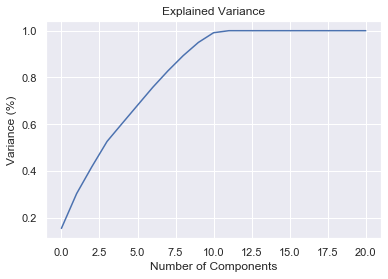

In [27]:

pca = PCA()
principalComponents = pca.fit_transform(scaled_data)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [28]:
pca = PCA(n_components=10)
new_data = pca.fit_transform(scaled_data)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10'])

In [16]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10
0,-0.327209,-0.730313,0.238772,1.139414,0.170486,0.004593,-0.080793,0.112666,-0.282636,0.008475
1,-0.330983,-0.746609,0.220269,1.129826,-0.104284,0.001027,0.074682,0.012810,-0.288056,0.016108
2,-0.419610,-0.764806,-0.972604,0.184669,-0.021132,0.002393,0.033493,0.016666,-0.287611,0.041993
3,-0.419633,-0.764850,-0.972740,0.184594,-0.026130,0.001672,0.026131,0.016733,-0.287554,0.042030
4,-0.410170,-0.758366,-0.831876,0.313857,-0.038386,0.001584,0.035221,0.020528,-0.275192,0.055248
...,...,...,...,...,...,...,...,...,...,...
265185,-0.350385,-0.802912,0.023915,0.971922,-0.890477,-0.003963,0.599491,-0.296277,-0.317385,0.025862
265186,-0.420288,-0.808346,-0.887538,0.285122,-0.837812,-0.003129,0.575575,-0.286217,-0.292272,0.078308
265187,-0.412321,-0.774420,-0.849227,0.304969,-0.277283,0.002260,0.229106,-0.077089,-0.280766,0.062439
265188,-0.410535,-0.801919,-0.746630,0.414426,-0.847937,-0.002937,0.587396,-0.282364,-0.279922,0.091499


In [29]:
# let's see how well our model perform on this new data
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 0.40, random_state= 355)
#let's first visualize the tree on the data without doing any pre processing
#clf = DecisionTreeClassifier()
#clf.fit(x_train,y_train)
#clf.score(x_test,y_test)

In [30]:


lr = LogisticRegression()
#dt = DecisionTreeClassifier()
#rf = RandomForestClassifier()

In [31]:
#training with all classifiers
lr.fit(x_train,y_train)
#print(rf.fit(x_train,x_train))
#dt.fit(x_train,y_train)

MemoryError: Unable to allocate 3.97 GiB for an array with shape (159114, 3346) and data type int64

In [ ]:
#Individual metrics to validate highest score with AUC in ROC
lr.score(x_test,y_test)

In [ ]:
rf.score(x_test,y_test)

In [ ]:
dt.score(x_test,y_test)

In [ ]:
#Finally Plot ROC AUC curve
disp = plot_roc_curve(dt,x_test,y_test)

plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)

plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)

In [ ]:
#from this ROC AUC curve we can determine which classifier to use,we can use voting classifier also to choose best classifier.

In [ ]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

In [ ]:
X_train,x_test,Y_train,y_test = train_test_split(principal_x,y,test_size=.30,random_state=41)

In [ ]:
voting_clf = VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('sc',svm_clf)],voting='hard')

In [ ]:
voting_clf.fit(X_train,Y_train)

In [ ]:
for clf in (log_clf,rnd_clf,svm_clf):
    clf.fit(X_train,Y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))
    

In [ ]:
#Now doing some hyperparameter tuning

In [ ]:
#param_grid={'C':[0.1,1,10,50,100,500],'gamma':[1.0,0.5,0.1,0.01,0.001]}
param_grid={'C':[1,10,50],'gamma':[1.0,0.1,0.01]}

In [ ]:
grid= GridSearchCV(SVC(),param_grid, verbose=3, n_jobs=-1)

In [ ]:
grid.fit(X_train,Y_train)

In [ ]:
grid.best_params_

In [ ]:
#Now assuming C=10 and gamma=0.01 i am using in Support Vector Machine Model.
SVMmodel_new=SVC(C=10, gamma=0.01)
SVMmodel_new.fit(X_train,Y_train)

In [ ]:
y_pred=SVMmodel_new.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
#Creating Pipeline
pipe = Pipeline([('Scaler', StandardScaler()),
                 ('SVM', SVC())])

In [ ]:
param_grid={'SVM__C':[0.001,2,3,4,5,6,7,10], 'SVM__gamma':[0.1,0.2,0.3,0.4,0.5,0.6,1]}

gridcv = GridSearchCV(pipe,param_grid,cv=5)

gridcv.fit(X_train,Y_train)

In [ ]:
bst_param = gridcv.best_estimator_
bst_param

In [ ]:
#Now assuming C=4 and gamma=0.5
pipe = Pipeline([('scaler', StandardScaler()),
                 ('PCA',PCA(n_components=10)),
                 ('SVM', SVC(C=4, gamma=0.5))])

In [ ]:
pipe.fit(X_train,Y_train)

In [ ]:
accuracy_score(y_test,pipe.predict(x_test))

In [ ]:
# saving the model to the local file system
"""from joblib import dump, load
filename = 'test1.joblib'
dump(svr_new, filename) """
filename = 'finalized_SVMmodeforHouseRentPrediction.pickle'
pickle.dump(SVMmodel_new, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
#Here I am using the scaled data to predict the output.I am taking the 1st index record for prediction.
prediction=loaded_model.predict(([[-0.330983
-0.746609
0.220269
1.129826
-0.104284
0.001027
0.074682
0.012810
-0.288056
0.016108]]))
print(prediction[0])